In [117]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm

DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning\\WhiteBloodCellsctg"

In [118]:
LeukemiaWhiteBloodcells_path = os.path.join(DATADIR, 'LeukemiaWhiteBloodcells')
HealthyWhiteBloodcells_path = os.path.join(DATADIR, 'HealthyWhiteBloodcells')

In [119]:
print(len(os.listdir(HealthyWhiteBloodcells_path)))

309


In [120]:
print(len(os.listdir(LeukemiaWhiteBloodcells_path)))

254


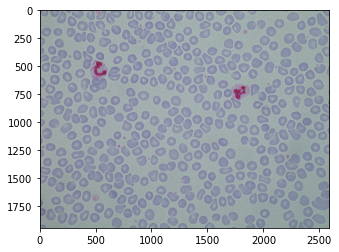

In [121]:
CATEGORIES = [ "HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]

for category in CATEGORIES:  # creating for loop to iterate over categories
    path = os.path.join(DATADIR,category)  # create acessble path to dataset
    for img in os.listdir(path):  # For loop inside a for loop to iterate and specify conditions for specifc images
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array, cmap='RdYlGn')  # graph it using matplotlive
        plt.show()  # display

        break  #Ending for loop
    break  

In [122]:
print(img_array.shape) #Printing dimensions of Image array in the form of a tuple

(1944, 2592, 3)


In [123]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import cv2
import tqdm as tqdm

DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning\\WhiteBloodCellsctg"

CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]


IMG_SIZE = 128
def create_training_data():
    training_data = []
    for category in CATEGORIES:  
        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=Leukemia, 1=Healthy
        LeukemiaWhiteBloodCells_path = os.path.join(DATADIR, 'LeukemiaWhiteBloodCells')
        HealthyWhiteBloodCells_path = os.path.join(DATADIR, 'HealthyWhiteBLoodCells')

        for img in os.listdir(path):  # iterate over each of the classes
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # Specifying color for Leukoscognosis iterating
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # training data, new numpyarray
            except Exception as e:  
                pass
    return training_data

    #DEFINE IMAGE SIZE

In [124]:
training_data = create_training_data()     #Creating training data in a seperate cell

In [125]:
len(training_data) #Length of Training Data

563

In [130]:
import random

random.shuffle(training_data)
#Shuffling the data in order to ensure that the machine does not learn just Leukemia or White BLood cells. Allows for a variety in data.
#Shuffles the new training data created, is a mutable list, meaning it can be changed
for sample in training_data [:10]: #Printed out 10 samples
    print(sample[1])

0
0
1
1
1
0
0
1
1
0


In [131]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)   
y = np.array(y) 

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3) #Needs to be 3, because of Color, in terms of Matplotlib


In [132]:
X.shape, y.shape #Dimensions of labels and features

((563, 128, 128, 3), (563,))

In [133]:
y.sum() #Summary of array of labels

254

In [134]:
X.shape

(563, 128, 128, 3)

In [135]:
y.shape

#Shape of array

(563,)

In [136]:
 X.shape[1:] #Dimensions

(128, 128, 3)

In [137]:
#Below is tensorboard code
from tensorflow.keras.callbacks import TensorBoard #Importiing visulizaion software, making keras callbacks
import time
NAME = "leukemiaClassifierSiriuseresearchNallamothu_iden.h5".format(int(time.time()))

TensorBoard(log_dir=" C:\\logs\\{}".format(NAME))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

import os

PATH = os.path.join('logs', NAME)
tensorboard = TensorBoard(log_dir=PATH) 

In [142]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import pickle


pickle_in = open("X.pickle","rb")


pickle_in = open("y.pickle","rb")

tf.compat.v1.random.set_random_seed(1234)
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:], activation='relu', padding='same'))

model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001,amsgrad=True),
              metrics=['accuracy'])


history = model.fit(X, y, batch_size=16, epochs=15, validation_split=0.15, 
                    class_weight={0:1, 1:1.1}) #Balancing out class weights, uneven datasets




#Epoch increases and decreases acuracy depending on the amount of time it went thorugh and learned the 'dataset'
#3 times means it went thorugh 3 times, it increases and decrase acuracy based on that

#So this is actually bulidng the layers of a machine learning network, and using the trianing data
#Labels, and feature, or X and Y varibles, are ensured in this model
#I personally put the batch size to 32, so the classifier would process 40 images at a time,because I don't want negative results, and have minimal samples
#Essentially bach size stops errors
#Split Validation predicts the 'fit' of the model to a training set. It increases as the 'learning' and epoch repitations take place

Train on 478 samples, validate on 85 samples
Epoch 1/15
478/478 [==============================] - 83s 174ms/sample - loss: 0.5698 - accuracy: 0.7218 - val_loss: 0.4635 - val_accuracy: 0.9294
Epoch 2/15
478/478 [==============================] - 80s 168ms/sample - loss: 0.2564 - accuracy: 0.9079 - val_loss: 1.7869 - val_accuracy: 0.4706
Epoch 3/15
478/478 [==============================] - 81s 170ms/sample - loss: 0.1250 - accuracy: 0.9519 - val_loss: 1.1144 - val_accuracy: 0.5765
Epoch 4/15
478/478 [==============================] - 81s 170ms/sample - loss: 0.0499 - accuracy: 0.9833 - val_loss: 0.1969 - val_accuracy: 0.9294
Epoch 5/15
478/478 [==============================] - 80s 168ms/sample - loss: 0.0172 - accuracy: 0.9979 - val_loss: 0.3083 - val_accuracy: 0.9059
Epoch 6/15
478/478 [==============================] - 81s 169ms/sample - loss: 0.0086 - accuracy: 0.9979 - val_loss: 0.0825 - val_accuracy: 0.9765
Epoch 7/15
478/478 [==============================] - 80s 168ms/sample - 

In [150]:
model.save('leukemiaClassifieruseresearchSiriNallamothu_iden.h5') #Saves the model

In [151]:
#Saving to pickle
import pickle

pickle_out = open("tf_history.pkl","wb")
pickle.dump(history.history, pickle_out)
pickle_out.close()

In [1]:
from tensorflow.keras.models import load_model
# load model
model = load_model('leukemiaClassifieruseresearchSiriNallamothu_iden.h5') #Run this piece of code to load model when testing

In [ ]:
#Load model above

<function matplotlib.pyplot.show(*args, **kw)>

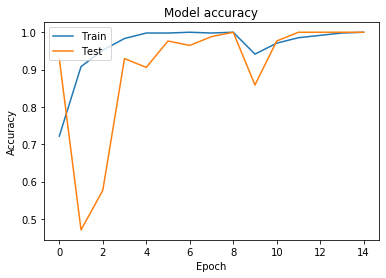

In [153]:
#Training and validation accuracy values 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import tqdm as tqdm
#Utlizing matplotlib to graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show

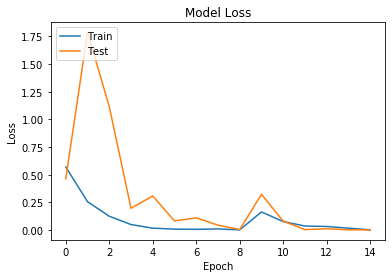

In [154]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import cv2
import tqdm as tqdm
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],loc='upper left')
plt.show()

In [155]:
#Next,the code will talk about redflags in terms of traning models, and how to fix them, and how to tweak the nueral nework in order to fit the images
#We will talk about how we know the model is training acuratly and 'Tensorboard'
#Tensorboard helps visulatiaziont of model as it is being trianed, it helps the programmer see progress, models and graphs

In [156]:
model.summary() #Describes layers, and respective shapes and dimensions of each layer

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_18 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_19 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 64, 64, 64)       

In [90]:
#X.shape[0] == y.shape[0]

In [68]:
#Next we will take the dataset we complied and saved,labled and pixeliated to 60. 
#aWe will feed it to trought the convolutional nueral network which will be built below
#The basis of a convolutional nueral network will be discussed, along with the steps of:
# Convolution -> Pooling -> Convolution -> Pooling -> Fully Connected Layer -> Output
#Convolution is essentially finding the 'useful' and key pointers of the image
#Pooling is putting all the 'usefull' things together, and it will go thorugh this process twice. Then the fully connected layer will ensue
#We trned the image into clarity to pixeleated, and the model will go through conoluion to find the best parsts of the image
#We continue this process untill we have a very basic image with all the pooling and key featurees, essentially disecting the image

#Convolutional windows use max poolings, and try to find the best features or our 'X' value in the list, the highest value is found in terms of max pooling
#Essentially finding key features that are the same between certain classfications
#Convolutional windows reduce pixels to values, and pooling reduces the image as a whole, then it goes to the fully connected layer which is essentially a nueral network. The ending is a bianary output


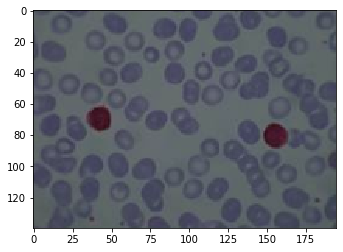

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from tqdm import tqdm

DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"

img_array = cv2.imread(DATADIR+'\\Testhealth01.png' , cv2.IMREAD_COLOR)  # convert to array


plt.imshow(img_array, cmap='RdYlGn')  # graph it
plt.show()  # display!



In [3]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0       



prediction = model.predict_classes([prepare(DATADIR+'\\Testhealth01.png')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\Testhealth01.png')])*100))


[[0]]
HealthyWhiteBLoodCells
The probability of Leukemia is:[[0.00101186]]%


In [101]:
#In this model I declared '0' as good, or Healthy White Blood Cells, and '1' as Bad, or Leukemia blood cells. 
#It is important to note that 0 always comes first, or good, so it in categories it is always 'Healthy' and 'Good'
#When you do 'model.predict', it prints out something like array [2.36e-0.6] which is basically equalivant to 0
#Essentially if it prints out a number that is close to 0, it is healthy, and if it is close to 91 percent then it is Leuekmmia
#This is because the model predicts with negativity, the higher the number the more plausible that it is Leuekmia

In [2]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0        

prediction = model.predict_classes([prepare(DATADIR+'\\Testhealth02.png')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\Testhealth02.png')])*100))


[[0]]
HealthyWhiteBLoodCells
The probability of Leukemia is:[[0.62529016]]%


In [3]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0        

prediction = model.predict_classes([prepare(DATADIR+'\\Testhealth03.png')])
print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])
print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\Testhealth03.png')])*100))

[[0]]
HealthyWhiteBLoodCells
The probability of Leukemia is:[[0.14490259]]%


In [2]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0        

prediction = model.predict_classes([prepare(DATADIR+'\\Testhealth04.png')])
print(prediction)  

print(CATEGORIES[int(prediction[0][0])])
print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\\Testhealth04.png')])*100))

[[0]]
HealthyWhiteBLoodCells
The probability of Leukemia is:[[0.03147652]]%


In [2]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0         #/255.0




prediction = model.predict_classes([prepare(DATADIR+'\\Testhealth05.png')])
print(prediction)  
print(CATEGORIES[int(prediction[0][0])])
print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\\Testhealth05.png')])*100))

[[0]]
HealthyWhiteBLoodCells
The probability of Leukemia is:[[0.2341775]]%


In [3]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0         

prediction = model.predict_classes([prepare(DATADIR+'\\Testhealth06.png')])
print(prediction) 

print(CATEGORIES[int(prediction[0][0])])
print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\Testhealth06.png')])*100))

[[0]]
HealthyWhiteBLoodCells
The probability of Leukemia is:[[0.0358336]]%


In [3]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0      

prediction = model.predict_classes([prepare(DATADIR+'\\Testhealth07.png')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\Testhealth07.png')])*100))


[[0]]
HealthyWhiteBLoodCells
The probability of Leukemia is:[[0.01339888]]%


In [188]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0       

prediction = model.predict_classes([prepare(DATADIR+'\\Testhealth08.png')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\Testhealth08.png')])*100))


[[0]]
HealthyWhiteBLoodCells
The probability of Leukemia is:[[0.]]%


In [187]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0        

prediction = model.predict_classes([prepare(DATADIR+'\\TestLeukemia01.png')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\TestLeukemia01.png')])*100))


[[1]]
LeukemiaWhiteBloodCells
The probability of Leukemia is:[[99.97013]]%


In [4]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0        

prediction = model.predict_classes([prepare(DATADIR+'\\TestLeukemia02.png')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\TestLeukemia02.png')])*100))


[[1]]
LeukemiaWhiteBloodCells
The probability of Leukemia is:[[99.84258]]%


In [172]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0         

prediction = model.predict_classes([prepare(DATADIR+'\\TestLeukemia03.png')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\TestLeukemia03.png')])*100))


[[1]]
LeukemiaWhiteBloodCells
The probability of Leukemia is:[[99.67874]]%


In [173]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0       

prediction = model.predict_classes([prepare(DATADIR+'\\TestLeukemia04.png')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\TestLeukemia04.png')])*100))


[[1]]
LeukemiaWhiteBloodCells
The probability of Leukemia is:[[99.99786]]%


In [174]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0        
prediction = model.predict_classes([prepare(DATADIR+'\\TestLeukemia05.png')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\TestLeukemia05.png')])*100))


[[1]]
LeukemiaWhiteBloodCells
The probability of Leukemia is:[[99.87039]]%


In [175]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0        

prediction = model.predict_classes([prepare(DATADIR+'\\TestLeukemia06.png')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\TestLeukemia06.png')])*100))


[[1]]
LeukemiaWhiteBloodCells
The probability of Leukemia is:[[99.84729]]%


In [176]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0        

prediction = model.predict_classes([prepare(DATADIR+'\\TestLeukemia07.png')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\TestLeukemia07.png')])*100))


[[1]]
LeukemiaWhiteBloodCells
The probability of Leukemia is:[[99.94017]]%


In [179]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0        

prediction = model.predict_classes([prepare(DATADIR+'\\TestLeukemia08.png')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\TestLeukemia08.png')])*100))


[[1]]
LeukemiaWhiteBloodCells
The probability of Leukemia is:[[97.54135]]%


In [16]:
#0=Good,Healthy Blood Cells, 1=Bad, or Leuekemia White Blood Cells

In [181]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0        

prediction = model.predict_classes([prepare(DATADIR+'\\trial01.jpg')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\trial01.jpg')])*100))


[[1]]
LeukemiaWhiteBloodCells
The probability of Leukemia is:[[99.99996]]%


In [4]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0         
prediction = model.predict_classes([prepare(DATADIR+'\\trial02.jpg')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\trial02.jpg')])*100))


[[0]]
HealthyWhiteBLoodCells
The probability of Leukemia is:[[7.632523]]%


In [185]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0         

prediction = model.predict_classes([prepare(DATADIR+'\\trial03.png')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\trial03.png')])*100))


[[1]]
LeukemiaWhiteBloodCells
The probability of Leukemia is:[[99.97583]]%


In [186]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0         #/255.0


#model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict_classes([prepare(DATADIR+'\\trial04.png')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\trial04.png')])*100))


[[1]]
LeukemiaWhiteBloodCells
The probability of Leukemia is:[[99.99968]]%


In [5]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0         #/255.0


#model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict_classes([prepare(DATADIR+'\\TestLeukemia06.png')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\TestLeukemia06.png')])*100))

[[1]]
LeukemiaWhiteBloodCells
The probability of Leukemia is:[[99.84729]]%


In [3]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0         #/255.0


#model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict_classes([prepare(DATADIR+'\\Testhealth07.png')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\Testhealth07.png')])*100))

[[0]]
HealthyWhiteBLoodCells
The probability of Leukemia is:[[0.01339888]]%


In [7]:
import cv2
import tensorflow as tf
import numpy as np
DATADIR = "C:\\Users\\SateeshSwathi\\Downloads\\LeukemiaMachineLearning"


CATEGORIES = ["HealthyWhiteBLoodCells","LeukemiaWhiteBloodCells"]
IMG_SIZE = 128  

def prepare(filepath):
   
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)/1.0         #/255.0


#model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict_classes([prepare(DATADIR+'\\TestLeukemia01.png')])

print(prediction)  # will be a list in a list.

print(CATEGORIES[int(prediction[0][0])])

print ("The probability of Leukemia is:{}%".format(model.predict([prepare(DATADIR+'\\TestLeukemia01.png')])*100))

[[1]]
LeukemiaWhiteBloodCells
The probability of Leukemia is:[[99.97013]]%
